In [2]:
from random import gauss
from random import seed
from pandas import Series
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
import sklearn

In [3]:
l = 50000
eSeriesX = np.zeros((5,l))

for i in range(5):
    seed(i)
    series = [gauss(0.0, 1.0) for i in range(l)]
    eSeriesX[i,:] = Series(series)


In [4]:
X = np.zeros((5,l))
for i in range(l):
    X[0,i] = .95*np.sqrt(2)*X[0,i-1] - .9025*X[0,i-2] + eSeriesX[0,i]
    X[1,i] = .5*X[0,i-2] + eSeriesX[1,i]
    X[2,i] = -.4*X[0,i-3] + eSeriesX[2,i]
    X[3,i] = -.5*X[0,i-2] + .25*np.sqrt(2)*X[3,i-1] + .25*np.sqrt(2)*X[4,i-1] + eSeriesX[3,i]
    X[4,i] = -.25*np.sqrt(2)*X[3,i-1] + .25*np.sqrt(2)*X[4,i-1] + eSeriesX[4,i]
X = np.transpose(X)

    

In [5]:
memVec =  [1, 2, 4, 8, 12, 16, 20]
ridgeVec = [0, 1, 100] 
error = np.zeros((len(memVec),2,len(ridgeVec)))
c = np.ones((l,1))

for L in ridgeVec:
    count = 0
    for px in memVec: #number of memory points to look to minus 1
        memMat = c
        hold = X
        error[memVec.index(px),0,ridgeVec.index(L)] = px
        for i in range(px):
            hold = np.roll(hold,1,axis=0)
            hold[0] = 0
            memMat = np.hstack((memMat,hold))

        runSum = 0
        cvLam = sklearn.model_selection.KFold(n_splits=10)
        for train, test in cvLam.split(memMat):
            ols = Ridge(alpha=L)
            ols.fit(memMat[train],X[train])
            pred = ols.predict(memMat[test])
            runSum = runSum + np.linalg.norm((X[test]-pred)) #I don't know if this is the best way to do the collective error
        error[memVec.index(px),1,ridgeVec.index(L)] = runSum

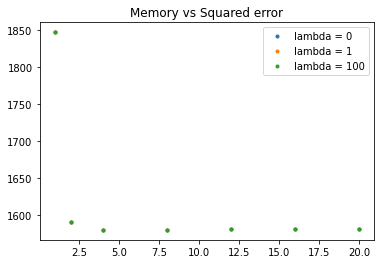

In [6]:
plt.title("Memory vs Squared error") #### can update the code below with this type of loop
for i in range(len(ridgeVec)):
    plt.plot(error[:, 0, i], error[:,1, i], ".", label = f"lambda = {ridgeVec[i]}")
plt.legend()
plt.show()

In [8]:
print(ols.coef_)

[[ 0.00000000e+00  1.33859307e+00 -1.89228076e-03 -1.25395101e-04
   5.28283270e-03  4.20926202e-03 -8.91221270e-01 -2.15098409e-03
  -5.58263528e-03 -3.08486187e-03  3.73890494e-03 -4.04305138e-03
  -6.25539625e-03 -8.43652086e-04 -9.36129220e-03 -4.18503819e-03
   2.22212348e-03 -4.43008086e-03  9.43174448e-04  6.15773135e-03
   9.36121995e-03 -9.95637465e-03 -6.59485352e-03  5.27411397e-04
   8.02316919e-03  3.64721411e-03  1.53988031e-02  2.71529959e-03
  -2.98977541e-03  2.11565134e-03 -3.67345743e-03  8.82755470e-04
   1.25004821e-03  5.75991660e-03 -1.11455983e-03 -1.57414926e-03
   4.26289493e-03 -3.81283730e-04 -6.94967179e-03 -2.48186758e-03
   2.53443330e-03  5.18640771e-03 -4.84590659e-03  3.22883003e-03
   5.71230874e-04 -5.35567388e-04 -6.91647820e-03 -3.66963778e-03
   6.69396458e-03  1.12933591e-03  1.50845275e-03  5.54513847e-04
   8.50349493e-03 -5.99243549e-03  1.44441751e-03  3.04632253e-03
   1.13730757e-02  1.47411613e-03  9.40647156e-03 -1.24862618e-02
  -2.82759